# Decision Trees - Ejemplo - Publicidad y Ventas

**Contexto**  
Este conjunto de datos contiene las ventas obtenidas, de acuerdo al monto invertido en publicidad en diferentes canales.

**Contenido**  
El conjunto de datos proviene de kaggle: [Advertising dataset](https://www.kaggle.com/datasets/tawfikelmetwally/advertising-dataset).  
Contiene 200 renglones, con las siguientes columnas:
* TV: inversión de anuncios por TV, en miles de USD
* Radio: inversión de anuncios en radio, en miles de USD
* Newspaper: inversión de anuncios en periódicos, en miles de USD
* **Sales**: ventas obtenidas en millones de USD **->(variable objetivo)**

**Planteamiento del problema**  
Se busca predecir que canales tienen mayor impacto en las ventas obtenidas.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn import tree

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
# Renombrar columnas
df.columns = ['renglón', 'tv', 'radio', 'periodico', 'ventas']
df.head()

,renglón,tv,radio,periodico,ventas
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Modelado

In [4]:
# Variables independientes
X = df[['tv', 'radio', 'periodico']]
X.head()

,tv,radio,periodico
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [5]:
# Variable dependiente
y = df[['ventas']]
y.head()

,ventas
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [6]:
print('X:', len(X), 'y:', len(y))

X: 200 y: 200


In [7]:
# Conjunto de entrenamiento y pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
print('X_train:', len(X_train), 'y_train:', len(y_train))
print('X_test:',  len(X_test),  'y_test:',  len(y_test))

X_train: 140 y_train: 140
X_test: 60 y_test: 60


In [9]:
# Entrenamiento
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [10]:
# Predicciones
prediction = model.predict(X_test)
prediction

array([11.3,  7.6,  8.8, 25.5, 12.9,  8.6,  6.6, 12.3,  8. , 14.7, 25.5,
        9.9, 10.6, 14.7, 12. , 11.9, 15.9,  6.6, 11.3, 17.4, 25.4, 10.6,
       14.6, 13.2,  8.6, 14.2, 14.5, 22.4, 10.6,  7. , 13.3, 19.2, 15.7,
       22.3,  5.3,  6.6,  8.6, 14.5, 11.3,  6.6, 15.3,  7.6, 17.3, 14.7,
       14.8, 14.2,  5.7,  9.3, 13.3, 11. , 11.5, 20.1, 15.7, 14.9,  9.6,
        7.6, 20.8, 14.5, 14.9,  5.3])

## Evaluacion

In [11]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print('R2:', metrics.r2_score(y_test, prediction))

MAE: 1.1300000000000001
MSE: 2.4836666666666667
RMSE: 1.575965312647035
R2: 0.9091024707695395


## Visualización

In [12]:
# Entrenamiento (para efectos de visualización)
model1 = DecisionTreeRegressor(max_depth=3)
model1.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [13]:
# Predicciones
prediction1 = model1.predict(X_test)
prediction1

array([10.66969697, 10.66969697, 10.66969697, 21.95925926, 11.95909091,
       10.66969697,  8.25      , 11.95909091,  8.25      , 14.85      ,
       21.95925926, 10.66969697, 11.95909091, 14.85      , 10.66969697,
       10.66969697, 14.85      ,  8.25      , 10.66969697, 14.85      ,
       21.95925926, 11.95909091, 14.85      , 14.85      , 10.66969697,
       10.66969697, 14.85      , 18.73888889, 11.95909091,  6.08      ,
       14.46666667, 18.73888889, 14.85      , 21.95925926,  6.08      ,
        6.08      , 10.66969697, 14.85      , 10.66969697,  6.08      ,
       14.46666667,  6.08      , 18.73888889, 14.85      , 14.85      ,
       10.66969697,  6.08      ,  8.25      , 14.46666667, 10.66969697,
       10.66969697, 21.95925926, 14.85      , 14.85      , 10.66969697,
       10.66969697, 21.95925926, 14.85      , 14.85      ,  6.08      ])

In [14]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction1))
print('MSE:', metrics.mean_squared_error(y_test, prediction1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction1)))
print('R2:', metrics.r2_score(y_test, prediction1))

MAE: 1.8757457912457913
MSE: 5.388454768164248
RMSE: 2.3213045401593146
R2: 0.8027926889828652


In [15]:
# Visualización de los resultados
text = tree.export_text(model1)
print(text)

|--- feature_0 <= 130.25
|   |--- feature_0 <= 33.30
|   |   |--- feature_1 <= 31.45
|   |   |   |--- value: [6.08]
|   |   |--- feature_1 >  31.45
|   |   |   |--- value: [8.25]
|   |--- feature_0 >  33.30
|   |   |--- feature_2 <= 49.00
|   |   |   |--- value: [10.67]
|   |   |--- feature_2 >  49.00
|   |   |   |--- value: [14.47]
|--- feature_0 >  130.25
|   |--- feature_1 <= 26.85
|   |   |--- feature_1 <= 9.70
|   |   |   |--- value: [11.96]
|   |   |--- feature_1 >  9.70
|   |   |   |--- value: [14.85]
|   |--- feature_1 >  26.85
|   |   |--- feature_0 <= 210.75
|   |   |   |--- value: [18.74]
|   |   |--- feature_0 >  210.75
|   |   |   |--- value: [21.96]



In [16]:
features = list(X.columns[0:])
features

['tv', 'radio', 'periodico']

In [17]:
target = list(y.columns[0:])
target

['ventas']

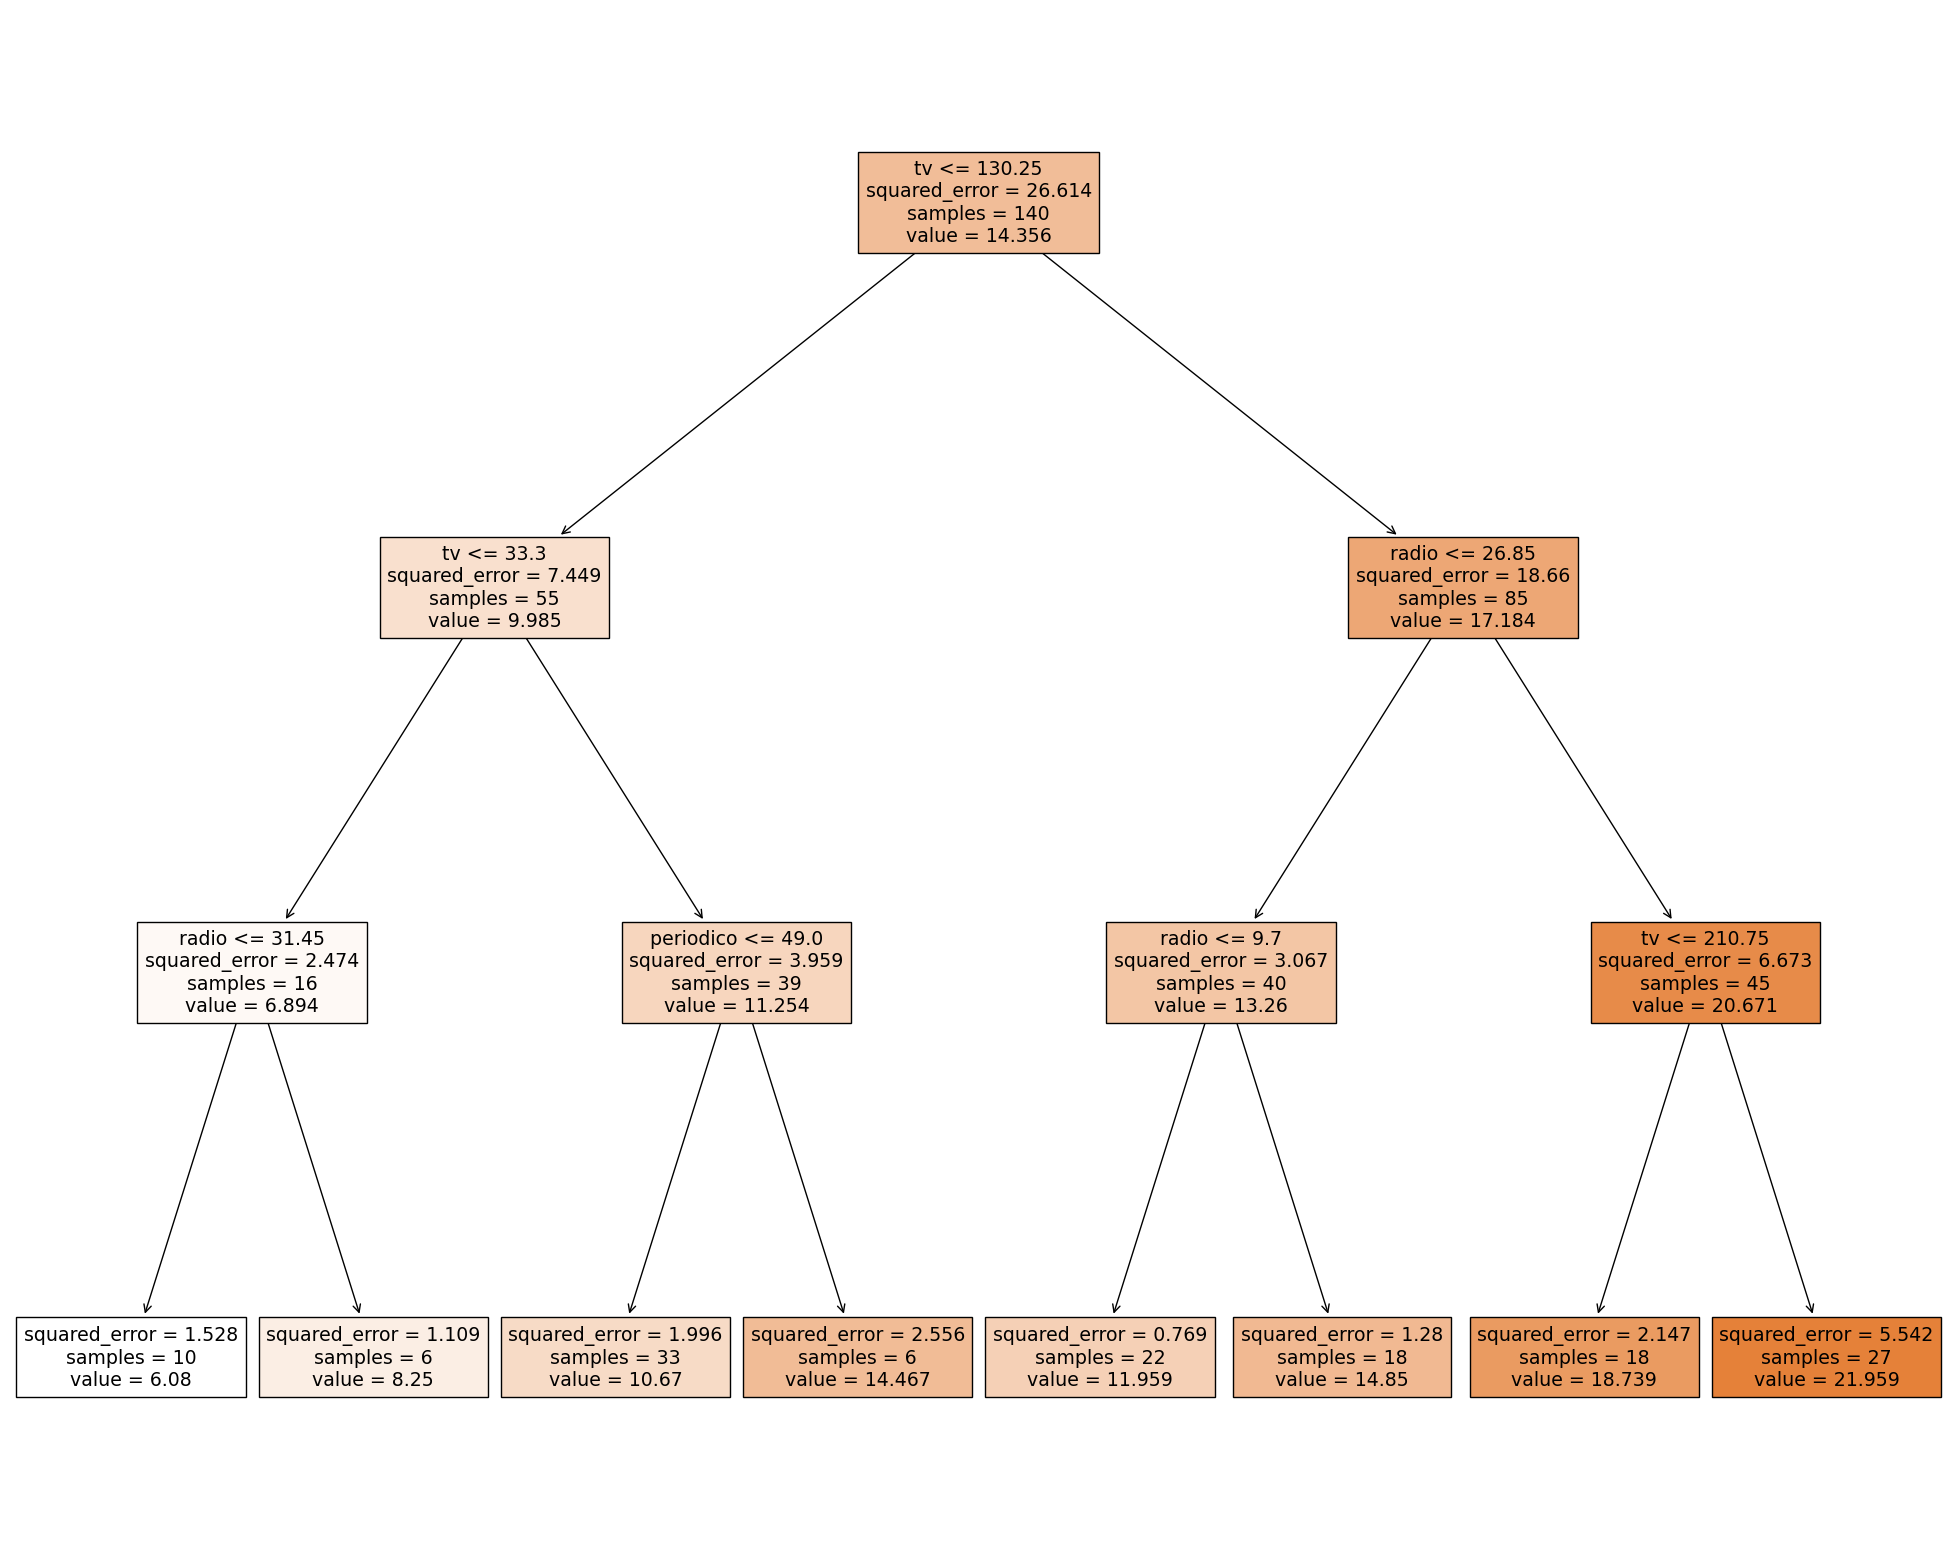

In [18]:
fig = plt.figure(figsize=(25,20))
_= tree.plot_tree(model1, feature_names=features, class_names=target, filled=True)